In [3]:
%matplotlib inline


# Histogram of Oriented Gradients

The Histogram of Oriented Gradient (HOG) feature descriptor is popular
for object detection [1]_.

In the following example, we compute the `HOG descriptor
<https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients>`__
and display a visualisation.

## Algorithm overview

Compute a Histogram of Oriented Gradients (HOG) by

1. (optional) global image normalisation 全局图像归一化
2. computing the gradient image in x and y 计算 x 和 y 中的梯度图像
3. computing gradient histograms 计算梯度直方图
4. normalising across blocks 跨块的规范化
5. flattening into a feature vector 展平为特征向量

The first stage applies an optional global image normalisation
equalisation that is designed to reduce the influence of illumination
effects. In practice we use gamma (power law) compression, either
computing the square root or the log of each color channel.
Image texture strength is typically proportional to the local surface
illumination so this compression helps to reduce the effects of local
shadowing and illumination variations.
第一阶段应用可选的全局图像归一化均衡，旨在减少照明效果的影响。在实践中，我们使用伽马（幂律）压缩，计算每个颜色通道的平方根或对数。图像纹理强度通常与局部表面照明成正比，因此这种压缩有助于减少局部阴影和照明变化的影响。

The second stage computes first order image gradients. These capture
contour, silhouette and some texture information, while providing
further resistance to illumination variations. The locally dominant
color channel is used, which provides color invariance to a large
extent. Variant methods may also include second order image derivatives,
which act as primitive bar detectors - a useful feature for capturing,
e.g. bar like structures in bicycles and limbs in humans.
第二阶段计算一阶图像梯度。它们可捕获轮廓、轮廓和一些纹理信息，同时进一步抵抗照明变化。使用局部显性颜色通道，这在很大程度上提供了颜色不变性。变体方法还可以包括二阶图像衍生物，其充当原始条形检测器 - 用于捕获的有用特征，例如自行车中的条形结构和人类的四肢。

The third stage aims to produce an encoding that is sensitive to
local image content while remaining resistant to small changes in
pose or appearance. The adopted method pools gradient orientation
information locally in the same way as the SIFT [2]_
feature. The image window is divided into small spatial regions,
called "cells". For each cell we accumulate a local 1-D histogram
of gradient or edge orientations over all the pixels in the
cell. This combined cell-level 1-D histogram forms the basic
"orientation histogram" representation. Each orientation histogram
divides the gradient angle range into a fixed number of
predetermined bins. The gradient magnitudes of the pixels in the
cell are used to vote into the orientation histogram.
第三阶段旨在产生一种对本地图像内容敏感的编码，同时保持对姿势或外观的微小变化的抵抗力。所采用的方法以与SIFT 2功能相同的方式局部汇集梯度方向信息。图像窗口被划分为小的空间区域，称为“细胞”。对于每个单元格，我们在单元格中的所有像素上累积渐变或边缘方向的局部一维直方图。这种组合的细胞级一维直方图形成基本的“方向直方图”表示形式。每个方向直方图将梯度角范围划分为固定数量的预定条柱。单元格中像素的渐变大小用于投票到方向直方图中。

The fourth stage computes normalisation, which takes local groups of
cells and contrast normalises their overall responses before passing
to next stage. Normalisation introduces better invariance to illumination,
shadowing, and edge contrast. It is performed by accumulating a measure
of local histogram "energy" over local groups of cells that we call
"blocks". The result is used to normalise each cell in the block.
Typically each individual cell is shared between several blocks, but
its normalisations are block dependent and thus different. The cell
thus appears several times in the final output vector with different
normalisations. This may seem redundant but it improves the performance.
We refer to the normalised block descriptors as Histogram of Oriented
Gradient (HOG) descriptors.
第四阶段计算归一化，该归一化采用局部细胞组并进行对比，使其整体反应正常化，然后再进入下一阶段。归一化为照明、阴影和边缘对比度引入了更好的不变性。它是通过在局部细胞组上累积局部直方图“能量”的度量来执行的，我们称之为“块”。结果用于规范化块中的每个单元格。通常，每个单独的单元在几个块之间共享，但其归一化是块相关的，因此是不同的。因此，该单元在具有不同归一化的最终输出向量中多次出现。这可能看起来是多余的，但它提高了性能。我们将归一化块描述符称为定向梯度直方图（HOG）描述符。

The final step collects the HOG descriptors from all blocks of a dense
overlapping grid of blocks covering the detection window into a combined
feature vector for use in the window classifier.
最后一步从覆盖检测窗口的密集重叠块网格的所有块中收集 HOG 描述符，并将其收集到组合特征向量中，以便在窗口分类器中使用。

## References

.. [1] Dalal, N. and Triggs, B., "Histograms of Oriented Gradients for
       Human Detection," IEEE Computer Society Conference on Computer
       Vision and Pattern Recognition, 2005, San Diego, CA, USA.

.. [2] David G. Lowe, "Distinctive image features from scale-invariant
       keypoints," International Journal of Computer Vision, 60, 2 (2004),
       pp. 91-110.


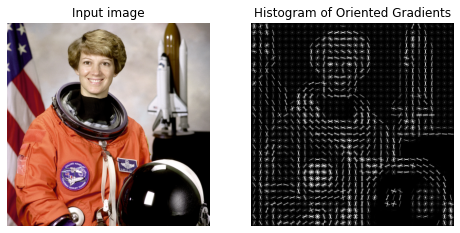

In [4]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()